[INFO] Running on device: cuda
[INFO] Downloading dataset via KaggleHub...
Using Colab cache for faster access to the 'spacenet-7-multitemporal-urban-development' dataset.
[INFO] Dataset located at: /kaggle/input/spacenet-7-multitemporal-urban-development
[INFO] TRAIN: Loading sequences from 64 cities...
[INFO] VAL: Loading sequences from 17 cities...

[INFO] Starting Training for 20 epochs...


Ep 1/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 1: Loss=0.01337 | PSNR=19.74dB | SSIM=0.6596 | Change F1=0.3259


Ep 2/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 2: Loss=0.01206 | PSNR=20.22dB | SSIM=0.6955 | Change F1=0.2351


Ep 3/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 3: Loss=0.01203 | PSNR=20.28dB | SSIM=0.6996 | Change F1=0.2929


Ep 4/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 4: Loss=0.01210 | PSNR=20.27dB | SSIM=0.7107 | Change F1=0.2600


Ep 5/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 5: Loss=0.01278 | PSNR=19.91dB | SSIM=0.6939 | Change F1=0.2433


Ep 6/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 6: Loss=0.01157 | PSNR=20.35dB | SSIM=0.7105 | Change F1=0.2341


Ep 7/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 7: Loss=0.01233 | PSNR=20.20dB | SSIM=0.7104 | Change F1=0.2430


Ep 8/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 8: Loss=0.01238 | PSNR=20.11dB | SSIM=0.6985 | Change F1=0.2049


Ep 9/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 9: Loss=0.01323 | PSNR=19.72dB | SSIM=0.6933 | Change F1=0.2852


Ep 10/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 10: Loss=0.01172 | PSNR=20.43dB | SSIM=0.7148 | Change F1=0.2444


Ep 11/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 11: Loss=0.01153 | PSNR=20.45dB | SSIM=0.7164 | Change F1=0.2195


Ep 12/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 12: Loss=0.01373 | PSNR=19.71dB | SSIM=0.6887 | Change F1=0.3127


Ep 13/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 13: Loss=0.01191 | PSNR=20.25dB | SSIM=0.7163 | Change F1=0.3257


Ep 14/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 14: Loss=0.01131 | PSNR=20.45dB | SSIM=0.7145 | Change F1=0.2214


Ep 15/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 15: Loss=0.01216 | PSNR=20.14dB | SSIM=0.7022 | Change F1=0.2600


Ep 16/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 16: Loss=0.01192 | PSNR=20.38dB | SSIM=0.7193 | Change F1=0.1987


Ep 17/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 17: Loss=0.01216 | PSNR=20.15dB | SSIM=0.7079 | Change F1=0.2986


Ep 18/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 18: Loss=0.01266 | PSNR=20.12dB | SSIM=0.6987 | Change F1=0.2262


Ep 19/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 19: Loss=0.01144 | PSNR=20.43dB | SSIM=0.7167 | Change F1=0.2304


Ep 20/20 [Train]:   0%|          | 0/165 [00:00<?, ?it/s]

Epoch 20: Loss=0.02616 | PSNR=18.53dB | SSIM=0.6785 | Change F1=0.2580
[INFO] Metrics saved.

[INFO] Starting 5-Year Future Simulation...


Simulating 5 Years:   0%|          | 0/60 [00:00<?, ?it/s]

[INFO] Future simulation saved.


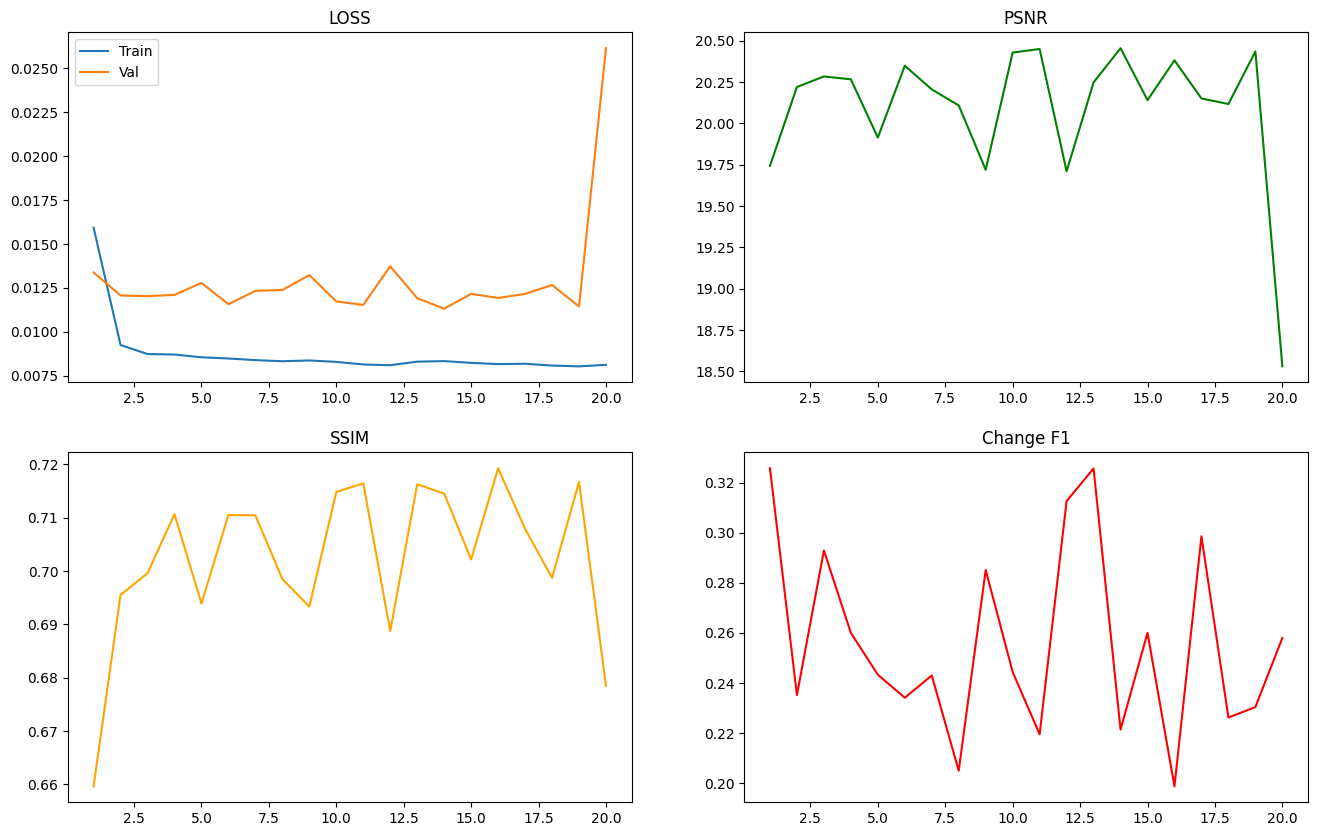

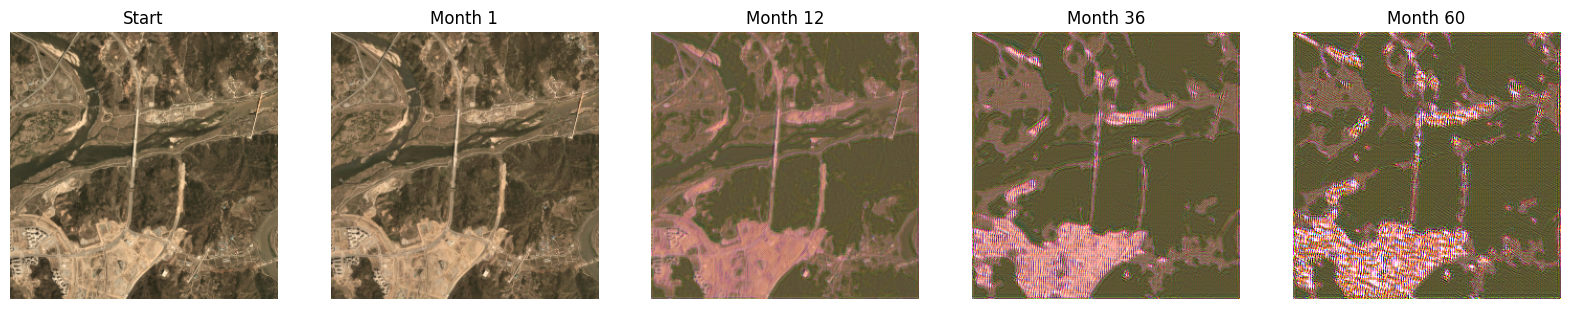

In [2]:
# =========================================================================
#  SPACENET-7: RESIDUAL LEARNING with RESNET BLOCKS
# =========================================================================

# 1. INSTALL DEPENDENCIES
!pip install -q rasterio kagglehub scikit-image

# 2. IMPORTS
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm
from skimage.metrics import structural_similarity as ssim
import kagglehub

# 3. CONFIGURATION
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 8
EPOCHS = 20
SEQ_LENGTH = 3      # t-3, t-2, t-1
IMG_SIZE = 256
OUT_DIR = "results_metrics"
os.makedirs(OUT_DIR, exist_ok=True)

print(f"[INFO] Running on device: {DEVICE}")

# 4. DOWNLOAD DATASET
print("[INFO] Downloading dataset via KaggleHub...")
try:
    raw_path = kagglehub.dataset_download("amerii/spacenet-7-multitemporal-urban-development")
    print(f"[INFO] Dataset located at: {raw_path}")
except Exception as e:
    print(f"[ERROR] Download failed: {e}")
    raw_path = "dataset"


# ==========================================
#  METRICS UTILITIES
# ==========================================

def calculate_psnr(pred, gt):
    mse = torch.mean((pred - gt) ** 2)
    if mse == 0: return 100.0
    return 20 * torch.log10(1.0 / torch.sqrt(mse))

def calculate_ssim_batch(pred_tensor, gt_tensor):
    pred_np = pred_tensor.detach().cpu().numpy().transpose(0, 2, 3, 1)
    gt_np = gt_tensor.detach().cpu().numpy().transpose(0, 2, 3, 1)

    batch_ssim = []
    for i in range(pred_np.shape[0]):
        score = ssim(pred_np[i], gt_np[i], channel_axis=2, data_range=1.0)
        batch_ssim.append(score)

    return np.mean(batch_ssim)

def calculate_change_f1(pred, gt, last_frame, threshold=0.05):
    true_diff = torch.abs(gt - last_frame)
    pred_diff = torch.abs(pred - last_frame)

    true_mask = (true_diff > threshold).float()
    pred_mask = (pred_diff > threshold).float()

    tp = (true_mask * pred_mask).sum()
    fp = (pred_mask * (1 - true_mask)).sum()
    fn = (true_mask * (1 - pred_mask)).sum()

    f1 = (2 * tp) / (2 * tp + fp + fn + 1e-6)
    return f1.item()


# ==========================================
#  DATASET & LOADING (UNCHANGED)
# ==========================================

def extract_timestamp(filepath):
    name = os.path.basename(filepath)
    parts = name.split("_")
    try: return int(parts[2]), int(parts[3])
    except: return 0, 0

def load_tif(path):
    try:
        with rasterio.open(path) as src:
            img = src.read()[:3]
        img = np.transpose(img, (1, 2, 0))
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = np.transpose(img, (2, 0, 1)).astype(np.float32)
        if img.max() > 0: img = img / 255.0
        return img
    except:
        return np.zeros((3, IMG_SIZE, IMG_SIZE), dtype=np.float32)

class SpaceNet7Dataset(Dataset):
    def __init__(self, root, seq_length=SEQ_LENGTH, mode='train', val_split=0.2):
        self.data = []
        image_dirs = []
        for dirpath, dirnames, filenames in os.walk(root):
            if "images_masked" in dirnames:
                image_dirs.append(os.path.join(dirpath, "images_masked"))

        image_dirs = sorted(image_dirs)
        split_idx = int(len(image_dirs) * (1 - val_split))
        selected_dirs = image_dirs[:split_idx] if mode == 'train' else image_dirs[split_idx:]

        print(f"[INFO] {mode.upper()}: Loading sequences from {len(selected_dirs)} cities...")

        for folder in selected_dirs:
            files = sorted(glob.glob(os.path.join(folder, "*.tif")), key=extract_timestamp)
            if len(files) > seq_length:
                for i in range(len(files) - seq_length):
                    self.data.append((files[i:i+seq_length], files[i+seq_length]))

    def __len__(self): return len(self.data)

    def __getitem__(self, idx):
        seq_paths, target_path = self.data[idx]
        seq_imgs = [load_tif(p) for p in seq_paths]
        x = torch.tensor(np.stack(seq_imgs))
        y = torch.tensor(load_tif(target_path))
        return x, y


# ==========================================
#  RESIDUAL BLOCK
# ==========================================

class ResBlock(nn.Module):
    def __init__(self, in_c, out_c):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_c, out_c, 3, padding=1),
            nn.BatchNorm2d(out_c)
        )
        self.shortcut = nn.Conv2d(in_c, out_c, 1) if in_c != out_c else nn.Identity()

    def forward(self, x):
        return torch.relu(self.conv(x) + self.shortcut(x))


# ==========================================
#  RESUNET
# ==========================================

class DeepUNet(nn.Module):  # name kept SAME for compatibility
    def __init__(self, in_channels=3):
        super().__init__()

        self.enc1 = ResBlock(in_channels, 64)
        self.enc2 = ResBlock(64, 128)
        self.enc3 = ResBlock(128, 256)
        self.enc4 = ResBlock(256, 512)

        self.pool = nn.MaxPool2d(2, 2)

        self.up3 = nn.ConvTranspose2d(512, 256, 2, 2)
        self.dec3 = ResBlock(512, 256)

        self.up2 = nn.ConvTranspose2d(256, 128, 2, 2)
        self.dec2 = ResBlock(256, 128)

        self.up1 = nn.ConvTranspose2d(128, 64, 2, 2)
        self.dec1 = ResBlock(128, 64)

        self.final_conv = nn.Conv2d(64, 3, 1)

    def forward(self, x):
        e1 = self.enc1(x)
        e2 = self.enc2(self.pool(e1))
        e3 = self.enc3(self.pool(e2))
        e4 = self.enc4(self.pool(e3))

        d3 = self.dec3(torch.cat([self.up3(e4), e3], 1))
        d2 = self.dec2(torch.cat([self.up2(d3), e2], 1))
        d1 = self.dec1(torch.cat([self.up1(d2), e1], 1))

        return self.final_conv(d1)


# ==========================================
#  TRAINING + METRICS
# ==========================================

def save_comparison_plot(last_in, gt, pred, epoch, idx, ssim_val, psnr_val):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(np.clip(last_in.permute(1, 2, 0).cpu().numpy(), 0, 1))
    plt.title("Input (Month t-1)")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(np.clip(pred.permute(1, 2, 0).cpu().numpy(), 0, 1))
    plt.title(f"Prediction (t)\nSSIM: {ssim_val:.3f} | PSNR: {psnr_val:.1f}dB")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(np.clip(gt.permute(1, 2, 0).cpu().numpy(), 0, 1))
    plt.title("Ground Truth (Month t)")
    plt.axis("off")

    plt.savefig(f"{OUT_DIR}/epoch_{epoch}_sample_{idx}.png")
    plt.close()


def train_and_evaluate():
    train_ds = SpaceNet7Dataset(raw_path, mode='train')
    val_ds = SpaceNet7Dataset(raw_path, mode='val')

    train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

    model = DeepUNet(in_channels=3 * SEQ_LENGTH).to(DEVICE)
    optimizer = optim.Adam(model.parameters(), lr=2e-4)
    criterion = nn.MSELoss()

    history = {'train_loss': [], 'val_loss': [], 'val_psnr': [], 'val_ssim': [], 'val_f1': []}

    print(f"\n[INFO] Starting Training for {EPOCHS} epochs...")

    for epoch in range(EPOCHS):

        model.train()
        t_loss = 0
        loop = tqdm(train_loader, desc=f"Ep {epoch+1}/{EPOCHS} [Train]", leave=False)

        for x, y in loop:
            x, y = x.to(DEVICE), y.to(DEVICE)
            B, T, C, H, W = x.shape

            model_input = x.view(B, T*C, H, W)
            last_frame = x[:, -1]

            target_residual = y - last_frame
            pred_residual = model(model_input)

            loss = criterion(pred_residual, target_residual)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            t_loss += loss.item()

        history['train_loss'].append(t_loss / len(train_loader))

        # ---------------------------------------
        # VALIDATION
        # ---------------------------------------
        model.eval()
        v_loss = v_psnr = v_ssim = v_f1 = 0

        with torch.no_grad():
            for i, (x, y) in enumerate(val_loader):
                x, y = x.to(DEVICE), y.to(DEVICE)
                B, T, C, H, W = x.shape

                model_input = x.view(B, T*C, H, W)
                last_frame = x[:, -1]

                pred_residual = model(model_input)
                pred_image = last_frame + pred_residual
                pred_image = torch.clamp(pred_image, 0, 1)

                v_loss += criterion(pred_image, y).item()
                v_psnr += calculate_psnr(pred_image, y).item()
                v_ssim += calculate_ssim_batch(pred_image, y)
                v_f1 += calculate_change_f1(pred_image, y, last_frame)

                if i == 0:
                    save_comparison_plot(last_frame[0], y[0], pred_image[0],
                                         epoch, 0,
                                         v_ssim / (i+1), v_psnr / (i+1))

        history['val_loss'].append(v_loss / len(val_loader))
        history['val_psnr'].append(v_psnr / len(val_loader))
        history['val_ssim'].append(v_ssim / len(val_loader))
        history['val_f1'].append(v_f1 / len(val_loader))

        print(f"Epoch {epoch+1}: Loss={history['val_loss'][-1]:.5f} "
              f"| PSNR={history['val_psnr'][-1]:.2f}dB "
              f"| SSIM={history['val_ssim'][-1]:.4f} "
              f"| Change F1={history['val_f1'][-1]:.4f}")

    torch.save(model.state_dict(), f"{OUT_DIR}/final_model.pth")
    return model, history, val_ds



# ==========================================
#  PLOT METRICS
# ==========================================

def plot_history(history):
    epochs = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(16,10))

    plt.subplot(2,2,1)
    plt.plot(epochs, history['train_loss'], label='Train')
    plt.plot(epochs, history['val_loss'], label='Val')
    plt.title("LOSS")
    plt.legend()

    plt.subplot(2,2,2)
    plt.plot(epochs, history['val_psnr'], color="green")
    plt.title("PSNR")

    plt.subplot(2,2,3)
    plt.plot(epochs, history['val_ssim'], color="orange")
    plt.title("SSIM")

    plt.subplot(2,2,4)
    plt.plot(epochs, history['val_f1'], color="red")
    plt.title("Change F1")

    plt.savefig(f"{OUT_DIR}/training_metrics_plot.png")
    print(f"[INFO] Metrics saved.")


# ==========================================
#  LONG-TERM 5-YEAR PREDICTION
# ==========================================

def simulate_5_year_growth(model, dataset):
    print("\n[INFO] Starting 5-Year Future Simulation...")

    idx = np.random.randint(0, len(dataset))
    x, _ = dataset[idx]
    current_buffer = [x[i] for i in range(SEQ_LENGTH)]
    initial_img = current_buffer[-1].permute(1,2,0).numpy()

    model.eval()
    predictions = []
    NUM_MONTHS = 60

    with torch.no_grad():
        for month in tqdm(range(NUM_MONTHS), desc="Simulating 5 Years"):
            input_stack = torch.stack(current_buffer).unsqueeze(0).to(DEVICE)
            B,T,C,H,W = input_stack.shape

            model_input = input_stack.view(B, T*C, H, W)

            pred_residual = model(model_input)
            last_frame_tensor = input_stack[:, -1]
            next_frame_tensor = torch.clamp(last_frame_tensor + pred_residual, 0, 1)

            next_frame_cpu = next_frame_tensor.squeeze(0).cpu()
            current_buffer.pop(0)
            current_buffer.append(next_frame_cpu)

            predictions.append(next_frame_cpu.permute(1,2,0).numpy())

    years = [0, 1, 3, 5]
    indices = [0, 11, 35, 59]

    plt.figure(figsize=(20,5))

    plt.subplot(1,5,1)
    plt.imshow(initial_img)
    plt.title("Start")
    plt.axis("off")

    for i, idx in enumerate(indices):
        plt.subplot(1,5,i+2)
        plt.imshow(predictions[idx])
        plt.title(f"Month {idx+1}")
        plt.axis("off")

    plt.savefig(f"{OUT_DIR}/future_5_year_simulation.png")
    print("[INFO] Future simulation saved.")


# ==========================================
#  MAIN EXECUTION
# ==========================================

if __name__ == "__main__":
    model, history, val_ds = train_and_evaluate()
    plot_history(history)
    simulate_5_year_growth(model, val_ds)
